# Analysis of Key Factors Influencing US Home Prices - Shubhan Kamat

This notebook presents an analysis of key factors influencing US home prices over the last 20 years. The analysis is conducted as part of the assessment for the Quantitative Analytics team interview for the position of Analytics Engineer with Home.LLC.

## Overview

In this analysis, an attempt is made to identify and explore factors that have a significant impact on US home prices at the national level. Publicly available data sources are utilized to gather information on these factors, and models are constructed to understand their relationship with home prices.

The S&P Case-Schiller Home Price Index is used as a proxy for the home prices in this analysis.


## Dataset
Publically available datasets were used for this analysis.
    
Following is the detailed list of the data sources:

1) Disposable personal income (per capita) : https://fred.stlouisfed.org/series/A229RX0
2) Moody's Seasoned Aaa Corporate Bond Yield : https://fred.stlouisfed.org/series/AAA
3) Brave-Butters-Kelley Real Gross Domestic Product : https://fred.stlouisfed.org/series/BBKMGDP
4) New Privately-Owned Housing Units : https://fred.stlouisfed.org/series/COMPUTSA
5) Consumer Price Index: All Items: Total for United States : https://fred.stlouisfed.org/series/CPALTT01USM657N
6) S&P CoreLogic Case-Shiller U.S. National Home Price Index : https://fred.stlouisfed.org/series/CSUSHPISA
7) Federal Funds Effective Rate : https://fred.stlouisfed.org/series/FEDFUNDS
8) 30-Year Fixed Rate Mortgage Average in the United States : https://fred.stlouisfed.org/series/MORTGAGE30US
9) Monthly Supply of New Houses in the United States : https://fred.stlouisfed.org/series/MSACSR
10) New Houses for Sale by Stage of Construction, Completed : https://fred.stlouisfed.org/series/NHFSEPCS
11) Population : https://fred.stlouisfed.org/series/POPTHM
12) National Totals of State and Local Tax Revenue: T01 Property Taxes for the United States : https://fred.stlouisfed.org/series/QTAXT01QTAXCAT1USNO
13) Homeownership Rate in the United States : https://fred.stlouisfed.org/series/RHORUSQ156N
14) Financial Market: Share Prices for United States : https://fred.stlouisfed.org/series/SPASTT01USM661N
15) Unemployment Rate : https://fred.stlouisfed.org/series/UNRATE
16) Construction Materials Index : https://fred.stlouisfed.org/series/WPUSI012011

The target variable for this analysis is the S&P Case-Schiller Home Price Index. 





First step is to install some necessary Python libraries

In [701]:
'''!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn '''

'!pip install pandas\n!pip install seaborn\n!pip install matplotlib\n!pip install scikit-learn '

In [702]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [703]:
# Loading the datasets
Case_Shiller_Index = pd.read_csv('Datasets/CSUSHPISA.csv')
BBK_Real_GDP = pd.read_csv('Datasets/BBKMGDP.csv')
Real_Disp_IncomePC = pd.read_csv('Datasets/A229RX0.csv')

#Moody's Seasoned Aaa Corporate Bond Yield
AAA_Bond_Yield = pd.read_csv('Datasets/AAA.csv')

#New Privately-Owned Housing Units Completed: Total Units (COMPUTSA)
New_Housing_Units = pd.read_csv('Datasets/COMPUTSA.csv')

#Consumer Price Index: All Items: Total for United States
CPI_All_Items = pd.read_csv('Datasets/CPALTT01USM657N.csv')

#Federal Funds Effective Rate (FEDFUNDS)
Fed_Funds = pd.read_csv('Datasets/FEDFUNDS.csv')

#30-Year Fixed Rate Mortgage Average in the United States
Mortgage_Thirty_Yr = pd.read_csv('Datasets/MORTGAGE30US.csv')

#Monthly Supply of New Houses in the United States (MSACSR)
New_Houses_Monthly = pd.read_csv('Datasets/MSACSR.csv')

# New Houses for Sale by Stage of Construction, Completed (NHFSEPCS)
New_Houses_ForSale = pd.read_csv('Datasets/NHFSEPCS.csv')

# Population (POPTHM)
Population_Monthly = pd.read_csv('Datasets/POPTHM.csv')

#Homeownership Rate in the United States 
Home_Ownership_Rate = pd.read_csv('Datasets/RHORUSQ156N.csv')

# Personal current taxes: State and local: Property taxes
Property_Taxes_Quarterly = pd.read_csv('Datasets/QTAXT01QTAXCAT1USNO.csv')

#Financial Market: Share Prices for United States 
Share_Prices_Monthly = pd.read_csv('Datasets/SPASTT01USM661N.csv')

#Producer Price Index by Commodity: Special Indexes: Construction Materials
Constructin_Price_Index = pd.read_csv('Datasets/WPUSI012011.csv')

#Unemployment rate
Unemployment_Rate = pd.read_csv('Datasets/UNRATE.csv')

In [704]:
#Exploring the Case-Shiller Index Data

Case_Shiller_Index.head()



,DATE,CSUSHPISA
0,2004-02-01,143.191
1,2004-03-01,145.058
2,2004-04-01,146.592
3,2004-05-01,148.185
4,2004-06-01,149.850


Since the time period for the analysis is 20 years, the data is taken from 1 February 2004 to 1 February 2024 (The date of the last index value)

As the CSVs are explored, the columns will also be renamed to more suitable names

In [705]:
# Last 5 values in the index data
Case_Shiller_Index.rename(columns={'CSUSHPISA': 'Case-Shiller Index'}, inplace=True)
Case_Shiller_Index.tail()


,DATE,Case-Shiller Index
236,2023-10-01,312.946
237,2023-11-01,313.629
238,2023-12-01,314.338
239,2024-01-01,315.297
240,2024-02-01,316.576


In [706]:
#Exploring the Brave-Butters-Kelley Real Gross Domestic Product
BBK_Real_GDP.rename(columns={'BBKMGDP': 'Real GDP'}, inplace=True)
BBK_Real_GDP.describe()


,Real GDP
count,241.000000
mean,2.009067
std,7.455189
min,-69.047835
25%,0.902188
50%,2.534795
75%,3.810689
max,45.954756


In [707]:
# The figure is given on a monthly basis and has the same duration as the Case-Shiller index data
BBK_Real_GDP.head()

,DATE,Real GDP
0,2004-02-01,2.461780
1,2004-03-01,3.810689
2,2004-04-01,2.456233
3,2004-05-01,3.694925
4,2004-06-01,2.956024


In [708]:
# This CSV contains the per capita personal disposable income on a monthly basis for the same time duration as the Case-Shiller Index data
Real_Disp_IncomePC.rename(columns={'A229RX0': 'Per capita disposable income'}, inplace=True)
Real_Disp_IncomePC.head()

,DATE,Per capita disposable income
0,2004-02-01,37884.0
1,2004-03-01,38011.0
2,2004-04-01,38111.0
3,2004-05-01,38272.0
4,2004-06-01,38266.0


In [709]:
# This csv contains the Moody's Seasoned Corporate Bond Yield for AAA rated instruments on a monthly basis for the same duration as the Case-Shiller Index data
AAA_Bond_Yield.rename(columns={'AAA': 'AAA Bond yields'}, inplace=True)
AAA_Bond_Yield.head()

,DATE,AAA Bond yields
0,2004-02-01,5.50
1,2004-03-01,5.33
2,2004-04-01,5.73
3,2004-05-01,6.04
4,2004-06-01,6.01


In [710]:
# This csv contains the number of New Privately-Owned Housing Units Completed on a monthly basis for the same duration as the Case-Shiller Index data
New_Housing_Units.rename(columns={'COMPUTSA': 'New Housing Units'}, inplace=True)
New_Housing_Units.head()

,DATE,New Housing Units
0,2004-02-01,1718.0
1,2004-03-01,1794.0
2,2004-04-01,1938.0
3,2004-05-01,1893.0
4,2004-06-01,1857.0


In [711]:
# This csv has the Consumer Price Index for All Items for United States on a monthly basis for the same duration as the Case-Shiller Index data
CPI_All_Items.rename(columns={'CPALTT01USM657N': 'Consumer price index'}, inplace=True)
CPI_All_Items.head()

,DATE,Consumer price index
0,2004-02-01,0.539957
1,2004-03-01,0.644468
2,2004-04-01,0.320171
3,2004-05-01,0.585106
4,2004-06-01,0.317292


In [712]:
#This csv has the Federal Funds Effective Rate on a monthly basis for the same duration as the Case-Shiller Index data
Fed_Funds.rename(columns={'FEDFUNDS': 'Fed fund rate'}, inplace=True)
Fed_Funds.head()


,DATE,Fed fund rate
0,2004-02-01,1.01
1,2004-03-01,1.00
2,2004-04-01,1.00
3,2004-05-01,1.00
4,2004-06-01,1.03


In [713]:

# This csv has 30-Year Fixed Rate Mortgage Average in the United States on a weekly basis for the same duration as the Case-Shiller Index data
Mortgage_Thirty_Yr.rename(columns={'MORTGAGE30US': 'Fixed rate mortgage avg (USA)'}, inplace=True)
Mortgage_Thirty_Yr.head()


,DATE,Fixed rate mortgage avg (USA)
0,2004-02-05,5.72
1,2004-02-12,5.66
2,2004-02-19,5.58
3,2004-02-26,5.58
4,2004-03-04,5.59


In [714]:
#This csv has the Monthly Supply of New Houses in the United States for the same duration as the Case-Shiller Index data
New_Houses_Monthly.rename(columns={'MSACSR': 'Monthly supply of houses'}, inplace=True)
New_Houses_Monthly.head()


,DATE,Monthly supply of houses
0,2004-02-01,3.7
1,2004-03-01,3.6
2,2004-04-01,4.0
3,2004-05-01,3.8
4,2004-06-01,3.9


In [715]:
# This csv has the New Houses for Sale by Stage of Construction, Completed on a monthly basis for the same duration as the Case-Shiller Index data
New_Houses_ForSale.rename(columns={'NHFSEPCS': 'New Houses for sale'}, inplace=True)
New_Houses_ForSale.head()


,DATE,New Houses for sale
0,2004-02-01,84.0
1,2004-03-01,82.0
2,2004-04-01,88.0
3,2004-05-01,87.0
4,2004-06-01,85.0


In [716]:
# This csb has the monthly Population figures for the same duration as the Case-Shiller Index data
Population_Monthly.rename(columns={'POPTHM': 'Monthly population figures'}, inplace=True)
Population_Monthly.head()


,DATE,Monthly population figures
0,2004-02-01,292230.0
1,2004-03-01,292434.0
2,2004-04-01,292651.0
3,2004-05-01,292872.0
4,2004-06-01,293103.0


In [717]:
#This csv has the Homeownership Rate in the United States on a quarterly basis for the same duration as the Case-Shiller index data
Home_Ownership_Rate.rename(columns={'RHORUSQ156N': 'Home Ownership Rate'}, inplace=True)
Home_Ownership_Rate.head()


,DATE,Home Ownership Rate
0,2004-01-01,68.6
1,2004-04-01,69.2
2,2004-07-01,69.0
3,2004-10-01,69.2
4,2005-01-01,69.1


In [718]:
# This csv has the annual property taxes for the same duration as the Case-Shiller Index data
Property_Taxes_Quarterly.rename(columns={'QTAXT01QTAXCAT1USNO': 'Property taxes quarterly'}, inplace=True)
Property_Taxes_Quarterly.head()


,DATE,Property taxes quarterly
0,2004-01-01,82281.0
1,2004-04-01,61509.0
2,2004-07-01,61799.0
3,2004-10-01,120567.0
4,2005-01-01,87426.0


In [719]:
#This csv has the monthly Share Prices for United States for the same duration as the Case-Shiller Index data
Share_Prices_Monthly.rename(columns={'SPASTT01USM661N': 'Monthly share prices'}, inplace=True)
Share_Prices_Monthly.head()


,DATE,Monthly share prices
0,2004-02-01,62.40279
1,2004-03-01,61.57739
2,2004-04-01,61.84450
3,2004-05-01,59.72372
4,2004-06-01,61.33126


In [720]:
#This csv has the construction materials price index on a monthly basis for the same duration as the Case-Shiller price index data
Constructin_Price_Index.rename(columns={'WPUSI012011': 'Construction Price Index'}, inplace=True)
Constructin_Price_Index.head()


,DATE,Construction Price Index
0,2004-02-01,153.4
1,2004-03-01,156.5
2,2004-04-01,160.1
3,2004-05-01,162.7
4,2004-06-01,162.0


In [721]:
#This csv has the Unemployment rate on a monthly basis for the same duration as the Case-Shiller price index data
Unemployment_Rate.rename(columns={'UNRATE': 'Unemployment Rate'}, inplace=True)
Unemployment_Rate.head()

,DATE,Unemployment Rate
0,2004-02-01,5.6
1,2004-03-01,5.8
2,2004-04-01,5.6
3,2004-05-01,5.6
4,2004-06-01,5.6


In [722]:
#In this step, all the CSVs that have data on a monthly basis will be merged, first, a function is defined for the task

def merge_dataframes_on_date(dataframes, date_column='DATE'):
    """
    Merges a list of DataFrames on a common date column.

    Parameters:
    dataframes (list of pd.DataFrame): List of DataFrames to be merged
    date_column (str): The name of the date column to merge on

    Returns:
    pd.DataFrame: Merged DataFrame
    """
    if not dataframes:
        raise ValueError("The list of dataframes is empty")

    # Ensuring that all dataframes have the date column
    for df in dataframes:
        if date_column not in df.columns:
            raise ValueError(f"One of the dataframes does not have the column '{date_column}'")
    
    # Starting with the first dataframe 
    merged_df = dataframes[0]
    
    # Iterating over the rest of the dataframes and merging them on the date column
    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=date_column, how='outer')
    
    return merged_df




In [723]:



#List of dataframes with a monthly sampling rate
Monthly_Dataframes = [Case_Shiller_Index, BBK_Real_GDP, Real_Disp_IncomePC,AAA_Bond_Yield, New_Housing_Units, 
                      CPI_All_Items,Fed_Funds,New_Houses_Monthly,New_Houses_ForSale, Population_Monthly, 
                      Unemployment_Rate, Constructin_Price_Index, Share_Prices_Monthly ]

# Merge dataframes on date column
merged_df_Monthly = merge_dataframes_on_date(Monthly_Dataframes)

print(merged_df_Monthly)

           DATE  Case-Shiller Index  Real GDP  Per capita disposable income  \
0    2004-02-01             143.191  2.461780                       37884.0   
1    2004-03-01             145.058  3.810689                       38011.0   
2    2004-04-01             146.592  2.456233                       38111.0   
3    2004-05-01             148.185  3.694925                       38272.0   
4    2004-06-01             149.850  2.956024                       38266.0   
..          ...                 ...       ...                           ...   
236  2023-10-01             312.946  2.550735                       50176.0   
237  2023-11-01             313.629  2.934927                       50345.0   
238  2023-12-01             314.338  1.878912                       50425.0   
239  2024-01-01             315.297  0.047907                       50410.0   
240  2024-02-01             316.576  2.644913                       50344.0   

     AAA Bond yields  New Housing Units  Consumer p

In [724]:
# Next the dataframes which are not monthly data are handled

Weekly_Data = [Mortgage_Thirty_Yr] #Weekly sampling rate
Quarterly_Data = [Home_Ownership_Rate, Property_Taxes_Quarterly] #Quarterly sampling rate

Handling the dataframes with quarterly data

In [725]:
# The rate of the previous quarter is considered for the current months till the next quarterly rate is issued


# Converting column to datetime
merged_df_Monthly['DATE'] = pd.to_datetime(merged_df_Monthly['DATE'])
Home_Ownership_Rate['DATE'] = pd.to_datetime(Home_Ownership_Rate['DATE'])

# Extracting the year and quarter from quarterly data
Home_Ownership_Rate['YEAR'] = Home_Ownership_Rate['DATE'].dt.year
Home_Ownership_Rate['QUARTER'] = Home_Ownership_Rate['DATE'].dt.to_period('Q')

# Extracting the year and quarter from the monthly data
merged_df_Monthly['YEAR'] = merged_df_Monthly['DATE'].dt.year
merged_df_Monthly['QUARTER'] = merged_df_Monthly['DATE'].dt.to_period('Q')

# Merging on the year and quarter columns
merged_data_MA= pd.merge(merged_df_Monthly, Home_Ownership_Rate, on=['YEAR', 'QUARTER'], how='left')

# Dropping the redundant YEAR and QUARTER columns
merged_data_MA = merged_data_MA.drop(columns=['YEAR', 'QUARTER'])

merged_data_MA = merged_data_MA.rename(columns={'DATE_x': 'DATE'})

print(merged_data_MA)

          DATE  Case-Shiller Index  Real GDP  Per capita disposable income  \
0   2004-02-01             143.191  2.461780                       37884.0   
1   2004-03-01             145.058  3.810689                       38011.0   
2   2004-04-01             146.592  2.456233                       38111.0   
3   2004-05-01             148.185  3.694925                       38272.0   
4   2004-06-01             149.850  2.956024                       38266.0   
..         ...                 ...       ...                           ...   
236 2023-10-01             312.946  2.550735                       50176.0   
237 2023-11-01             313.629  2.934927                       50345.0   
238 2023-12-01             314.338  1.878912                       50425.0   
239 2024-01-01             315.297  0.047907                       50410.0   
240 2024-02-01             316.576  2.644913                       50344.0   

     AAA Bond yields  New Housing Units  Consumer price index  

In [726]:
# Same for the Property_Taxes_Quarterly dataframe

# Converting column to datetime
merged_data_MA['DATE'] = pd.to_datetime(merged_data_MA['DATE'])
Property_Taxes_Quarterly['DATE'] = pd.to_datetime(Property_Taxes_Quarterly['DATE'])

# Extracting the year and quarter from the quarterly data
Property_Taxes_Quarterly['YEAR'] = Property_Taxes_Quarterly['DATE'].dt.year
Property_Taxes_Quarterly['QUARTER'] = Property_Taxes_Quarterly['DATE'].dt.to_period('Q')

# Extracting the year and quarter from the monthly data
merged_data_MA['YEAR'] = merged_data_MA['DATE'].dt.year
merged_data_MA['QUARTER'] = merged_data_MA['DATE'].dt.to_period('Q')

# Merging on the year and quarter columns
merged_data_MA= pd.merge(merged_data_MA, Property_Taxes_Quarterly, on=['YEAR', 'QUARTER'], how='left')

# Dropping the redundant YEAR and QUARTER columns
merged_data_MA = merged_data_MA.drop(columns=['YEAR', 'QUARTER'])

merged_data_MA = merged_data_MA.rename(columns={'DATE_x': 'DATE'})

print(merged_data_MA)

          DATE  Case-Shiller Index  Real GDP  Per capita disposable income  \
0   2004-02-01             143.191  2.461780                       37884.0   
1   2004-03-01             145.058  3.810689                       38011.0   
2   2004-04-01             146.592  2.456233                       38111.0   
3   2004-05-01             148.185  3.694925                       38272.0   
4   2004-06-01             149.850  2.956024                       38266.0   
..         ...                 ...       ...                           ...   
236 2023-10-01             312.946  2.550735                       50176.0   
237 2023-11-01             313.629  2.934927                       50345.0   
238 2023-12-01             314.338  1.878912                       50425.0   
239 2024-01-01             315.297  0.047907                       50410.0   
240 2024-02-01             316.576  2.644913                       50344.0   

     AAA Bond yields  New Housing Units  Consumer price index  

Next the weekly data is handled

In [727]:
#For weekly data, the data of the weeks in a particular month is averaged
# Converting column to datetime
merged_data_MA['DATE'] = pd.to_datetime(merged_data_MA['DATE'])
Mortgage_Thirty_Yr['DATE'] = pd.to_datetime(Mortgage_Thirty_Yr['DATE'])

# Grouping weekly data by month and calculating the average
Mortgage_Thirty_Yr['YEAR_MONTH'] = Mortgage_Thirty_Yr['DATE'].dt.to_period('M')
monthly_avg = Mortgage_Thirty_Yr.groupby('YEAR_MONTH').mean().reset_index()

# Converting YEAR_MONTH back to a datetime format
monthly_avg['DATE'] = monthly_avg['YEAR_MONTH'].dt.to_timestamp()

# Merging the monthly averages with the monthly data
merged_data_final = pd.merge(merged_data_MA, monthly_avg[['DATE', 'Fixed rate mortgage avg (USA)']], on='DATE', how='left')

print(merged_data_final)


          DATE  Case-Shiller Index  Real GDP  Per capita disposable income  \
0   2004-02-01             143.191  2.461780                       37884.0   
1   2004-03-01             145.058  3.810689                       38011.0   
2   2004-04-01             146.592  2.456233                       38111.0   
3   2004-05-01             148.185  3.694925                       38272.0   
4   2004-06-01             149.850  2.956024                       38266.0   
..         ...                 ...       ...                           ...   
236 2023-10-01             312.946  2.550735                       50176.0   
237 2023-11-01             313.629  2.934927                       50345.0   
238 2023-12-01             314.338  1.878912                       50425.0   
239 2024-01-01             315.297  0.047907                       50410.0   
240 2024-02-01             316.576  2.644913                       50344.0   

     AAA Bond yields  New Housing Units  Consumer price index  

C:\Users\kam00\AppData\Local\Temp\ipykernel_20232\597856680.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = Mortgage_Thirty_Yr.groupby('YEAR_MONTH').mean().reset_index()


In [728]:
# Looking at the basic statistics and information in the data
merged_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           241 non-null    datetime64[ns]
 1   Case-Shiller Index             241 non-null    float64       
 2   Real GDP                       241 non-null    float64       
 3   Per capita disposable income   241 non-null    float64       
 4   AAA Bond yields                241 non-null    float64       
 5   New Housing Units              241 non-null    float64       
 6   Consumer price index           241 non-null    float64       
 7   Fed fund rate                  241 non-null    float64       
 8   Monthly supply of houses       241 non-null    float64       
 9   New Houses for sale            241 non-null    float64       
 10  Monthly population figures     241 non-null    float64       
 11  Unemployment Rate  

In [729]:
merged_data_final = merged_data_final.drop(columns=['DATE_y']) #Dropping the unnecessary column

# The dataset has one column with 2 missing values

In [730]:
merged_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           241 non-null    datetime64[ns]
 1   Case-Shiller Index             241 non-null    float64       
 2   Real GDP                       241 non-null    float64       
 3   Per capita disposable income   241 non-null    float64       
 4   AAA Bond yields                241 non-null    float64       
 5   New Housing Units              241 non-null    float64       
 6   Consumer price index           241 non-null    float64       
 7   Fed fund rate                  241 non-null    float64       
 8   Monthly supply of houses       241 non-null    float64       
 9   New Houses for sale            241 non-null    float64       
 10  Monthly population figures     241 non-null    float64       
 11  Unemployment Rate  

In [731]:
#Summary statistics of the data
merged_data_final.describe()

,Case-Shiller Index,Real GDP,Per capita disposable income,AAA Bond yields,New Housing Units,Consumer price index,Fed fund rate,Monthly supply of houses,New Houses for sale,Monthly population figures,Unemployment Rate,Construction Price Index,Monthly share prices,Home Ownership Rate,Property taxes quarterly,Fixed rate mortgage avg (USA)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,239.000000,241.000000
mean,190.496390,2.009067,43418.112033,4.364108,1191.614108,0.215226,1.530332,6.366805,82.356846,317310.290456,5.875519,223.329369,97.941725,66.069295,129976.543933,4.743834
std,49.145614,7.455189,4205.100574,0.981372,413.589416,0.403583,1.805510,1.922146,44.193576,13204.079288,2.106444,49.690112,29.246034,1.768960,53724.289335,1.190266
min,136.531000,-69.047835,37884.000000,2.140000,520.000000,-1.915290,0.050000,3.300000,31.000000,292230.000000,3.400000,153.400000,44.390980,62.900000,61509.000000,2.684000
25%,153.618000,0.902188,40007.000000,3.690000,839.000000,-0.025438,0.120000,5.000000,52.000000,306237.000000,4.400000,190.300000,74.790950,64.800000,92612.000000,3.802500
50%,177.556000,2.534795,41742.000000,4.240000,1182.000000,0.211082,0.400000,5.700000,68.000000,318642.000000,5.100000,211.300000,94.649220,65.800000,115676.000000,4.457500
75%,206.855000,3.810689,47029.000000,5.280000,1405.000000,0.481052,2.400000,7.600000,96.000000,329862.000000,7.300000,234.800000,118.303500,67.600000,153146.000000,5.855000
max,316.576000,45.954756,61509.000000,6.280000,2245.000000,1.373608,5.330000,12.200000,194.000000,336306.000000,14.800000,353.015000,162.447900,69.200000,303075.000000,7.620000


In [732]:
# Checking for missing values 
merged_data_final.isnull().sum()

DATE                             0
Case-Shiller Index               0
Real GDP                         0
Per capita disposable income     0
AAA Bond yields                  0
New Housing Units                0
Consumer price index             0
Fed fund rate                    0
Monthly supply of houses         0
New Houses for sale              0
Monthly population figures       0
Unemployment Rate                0
Construction Price Index         0
Monthly share prices             0
Home Ownership Rate              0
Property taxes quarterly         2
Fixed rate mortgage avg (USA)    0
dtype: int64

Heatmap of missing data

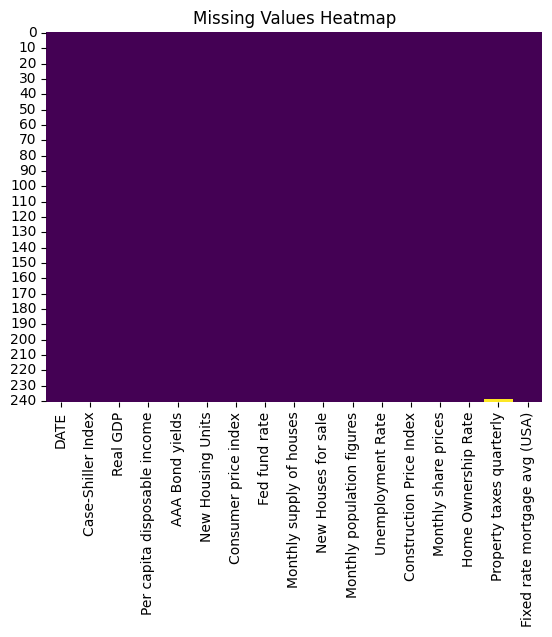

In [733]:

sns.heatmap(merged_data_final.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Next the column with missing values is handled, starting by plotting it

In [734]:
#Function to make time series plots

def plot_time_series(df, date_col, value_col, title='Time Series Plot', xlabel='Date', ylabel='Value'):
    """
    Plot a time series graph for the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    date_col (str): The name of the column containing the date values.
    value_col (str): The name of the column containing the values to be plotted.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    """
    # Ensuring the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Sorting the DataFrame by date
    df = df.sort_values(by=date_col)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_col], df[value_col], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



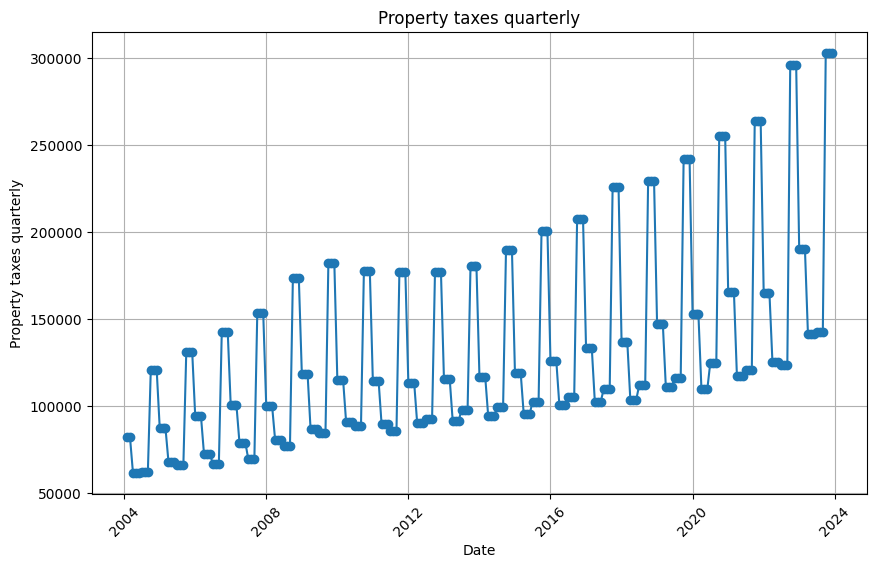

In [735]:
#Plotting the quarterly property taxes vs time
plot_time_series(merged_data_final, 'DATE', 'Property taxes quarterly', title='Property taxes quarterly', xlabel='Date', ylabel='Property taxes quarterly')


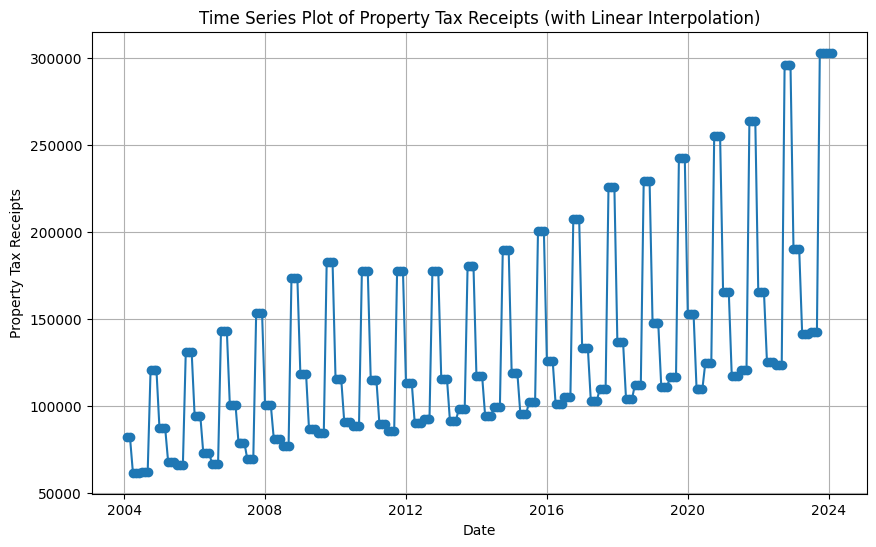

In [736]:
# Linear interpolation will be used to fill the missing values
merged_data_final['Property taxes quarterly'] = merged_data_final['Property taxes quarterly'].interpolate(method='linear')

# Plotting the time series with interpolation
plt.figure(figsize=(10, 6))
plt.plot(merged_data_final['DATE'], merged_data_final['Property taxes quarterly'], marker='o', linestyle='-')
plt.title('Time Series Plot of Property Tax Receipts (with Linear Interpolation)')
plt.xlabel('Date')
plt.ylabel('Property Tax Receipts')
plt.grid(True)
plt.show()


In [737]:
merged_data_final.tail(10)

,DATE,Case-Shiller Index,Real GDP,Per capita disposable income,AAA Bond yields,New Housing Units,Consumer price index,Fed fund rate,Monthly supply of houses,New Houses for sale,Monthly population figures,Unemployment Rate,Construction Price Index,Monthly share prices,Home Ownership Rate,Property taxes quarterly,Fixed rate mortgage avg (USA)
231,2023-05-01,302.454,2.671854,50215.0,4.67,1499.0,0.251844,5.06,6.9,65.0,334929.0,3.7,337.473,142.4708,65.9,141468.0,6.4250
232,2023-06-01,304.271,3.849592,50166.0,4.65,1480.0,0.322891,5.08,7.7,68.0,335080.0,3.6,337.336,145.8344,65.9,141468.0,6.7140
233,2023-07-01,306.438,5.690294,50161.0,4.66,1343.0,0.190752,5.12,7.3,71.0,335248.0,3.5,334.512,150.7520,66.0,142627.0,6.8400
234,2023-08-01,308.956,5.296842,50163.0,4.95,1373.0,0.436716,5.33,7.9,73.0,335431.0,3.8,333.794,149.6734,66.0,142627.0,7.0720
235,2023-09-01,311.065,4.682396,50106.0,5.13,1466.0,0.248513,5.33,7.5,73.0,335612.0,3.8,332.098,147.9842,66.0,142627.0,7.2000
236,2023-10-01,312.946,2.550735,50176.0,5.61,1382.0,-0.038338,5.33,7.9,75.0,335773.0,3.8,328.743,141.8852,65.7,303075.0,7.6200
237,2023-11-01,313.629,2.934927,50345.0,5.28,1466.0,-0.201514,5.33,8.8,76.0,335925.0,3.7,326.844,146.6592,65.7,303075.0,7.4420
238,2023-12-01,314.338,1.878912,50425.0,4.74,1557.0,-0.099332,5.33,8.2,81.0,336070.0,3.7,327.644,154.8774,65.7,303075.0,6.8150
239,2024-01-01,315.297,0.047907,50410.0,4.87,1504.0,0.544750,5.33,8.3,83.0,336194.0,3.7,334.259,157.3779,65.6,303075.0,6.6425
240,2024-02-01,316.576,2.644913,50344.0,5.03,1698.0,0.618967,5.33,8.9,89.0,336306.0,3.9,337.658,162.4479,65.6,303075.0,6.6300


In [738]:
merged_data_final.corr()

C:\Users\kam00\AppData\Local\Temp\ipykernel_20232\1009048702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data_final.corr()


,Case-Shiller Index,Real GDP,Per capita disposable income,AAA Bond yields,New Housing Units,Consumer price index,Fed fund rate,Monthly supply of houses,New Houses for sale,Monthly population figures,Unemployment Rate,Construction Price Index,Monthly share prices,Home Ownership Rate,Property taxes quarterly,Fixed rate mortgage avg (USA)
Case-Shiller Index,1.000000,0.032377,0.815034,-0.314533,0.393055,0.206616,0.382940,0.164895,-0.244116,0.691257,-0.565563,0.917393,0.894481,-0.171889,0.514268,0.132826
Real GDP,0.032377,1.000000,0.028308,-0.066227,0.055852,0.218608,0.016903,-0.230477,-0.124276,0.021948,-0.081134,0.022466,0.091952,-0.013239,-0.014125,-0.043284
Per capita disposable income,0.815034,0.028308,1.000000,-0.689662,0.045916,0.118482,-0.016310,-0.046431,-0.493216,0.895524,-0.284037,0.841753,0.890355,-0.458117,0.522839,-0.337732
AAA Bond yields,-0.314533,-0.066227,-0.689662,1.000000,0.268615,-0.040874,0.495273,0.478654,0.722852,-0.758183,0.025075,-0.449807,-0.584892,0.663528,-0.302027,0.868297
New Housing Units,0.393055,0.055852,0.045916,0.268615,1.000000,0.136102,0.702244,-0.106604,0.349050,-0.238804,-0.597387,0.037384,0.168394,0.515223,-0.034283,0.524065
Consumer price index,0.206616,0.218608,0.118482,-0.040874,0.136102,1.000000,0.068054,-0.046529,-0.060538,0.042968,-0.130620,0.187775,0.221717,0.052614,-0.216932,0.016093
Fed fund rate,0.382940,0.016903,-0.016310,0.495273,0.702244,0.068054,1.000000,0.295385,0.583549,-0.194945,-0.559753,0.086048,0.152050,0.448310,0.051442,0.793727
Monthly supply of houses,0.164895,-0.230477,-0.046431,0.478654,-0.106604,-0.046529,0.295385,1.000000,0.586450,-0.069049,0.004028,0.178389,-0.034032,0.247993,0.084978,0.520768
New Houses for sale,-0.244116,-0.124276,-0.493216,0.722852,0.349050,-0.060538,0.583549,0.586450,1.000000,-0.654533,-0.046777,-0.467904,-0.452591,0.685106,-0.275403,0.678465
Monthly population figures,0.691257,0.021948,0.895524,-0.758183,-0.238804,0.042968,-0.194945,-0.069049,-0.654533,1.000000,-0.270310,0.822457,0.857398,-0.754878,0.551133,-0.478882


As an initial step, the correlation between the variables will be analysed

C:\Users\kam00\AppData\Local\Temp\ipykernel_20232\2886009998.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data_final.corr(), annot=True, cmap='coolwarm')


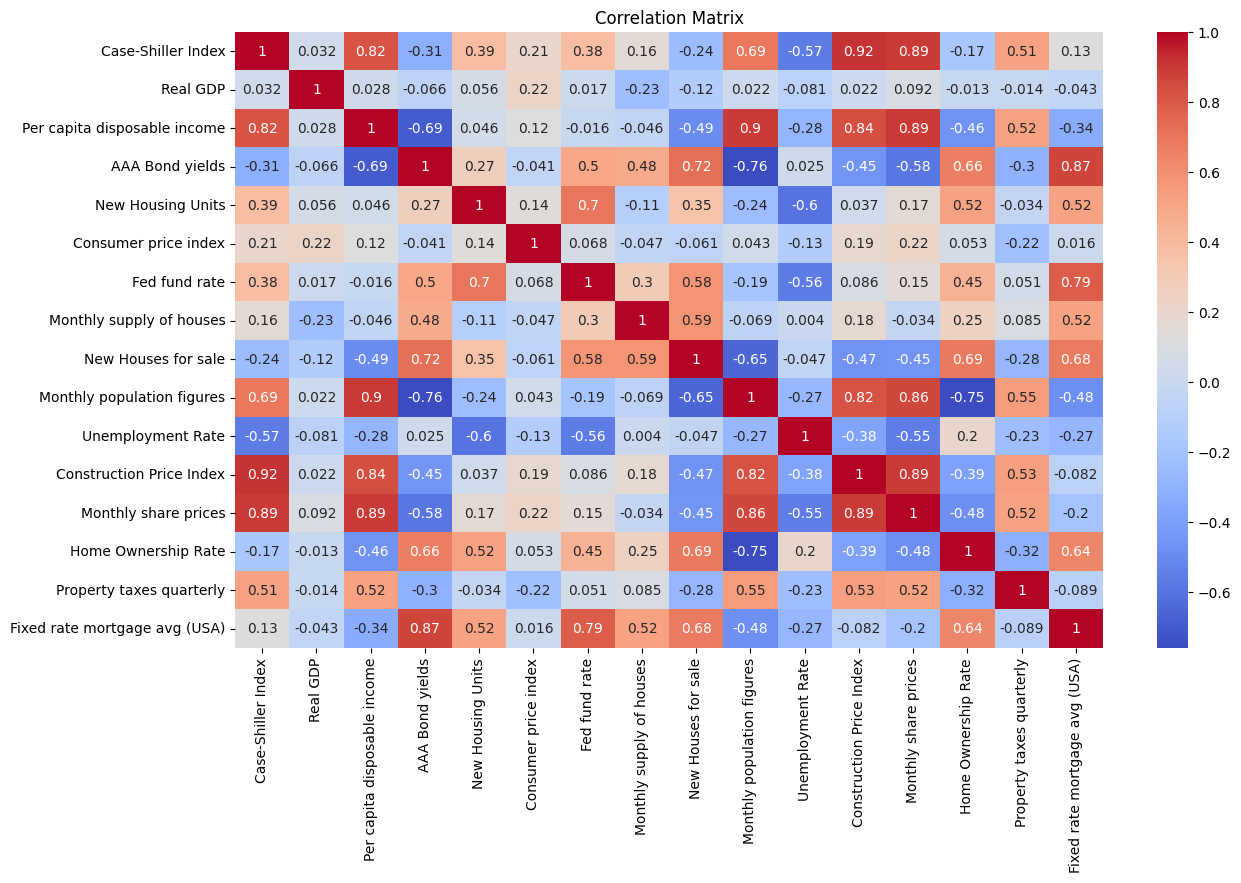

In [739]:
plt.figure(figsize=(14, 8))
sns.heatmap(merged_data_final.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In the above heatmap for the correlations, it can be seen that some predictor variables have strong correlations with each other, however these will not be dropped at this stage because the dataset has been curated with different aspects of the economy and each predictor has a distinct significance

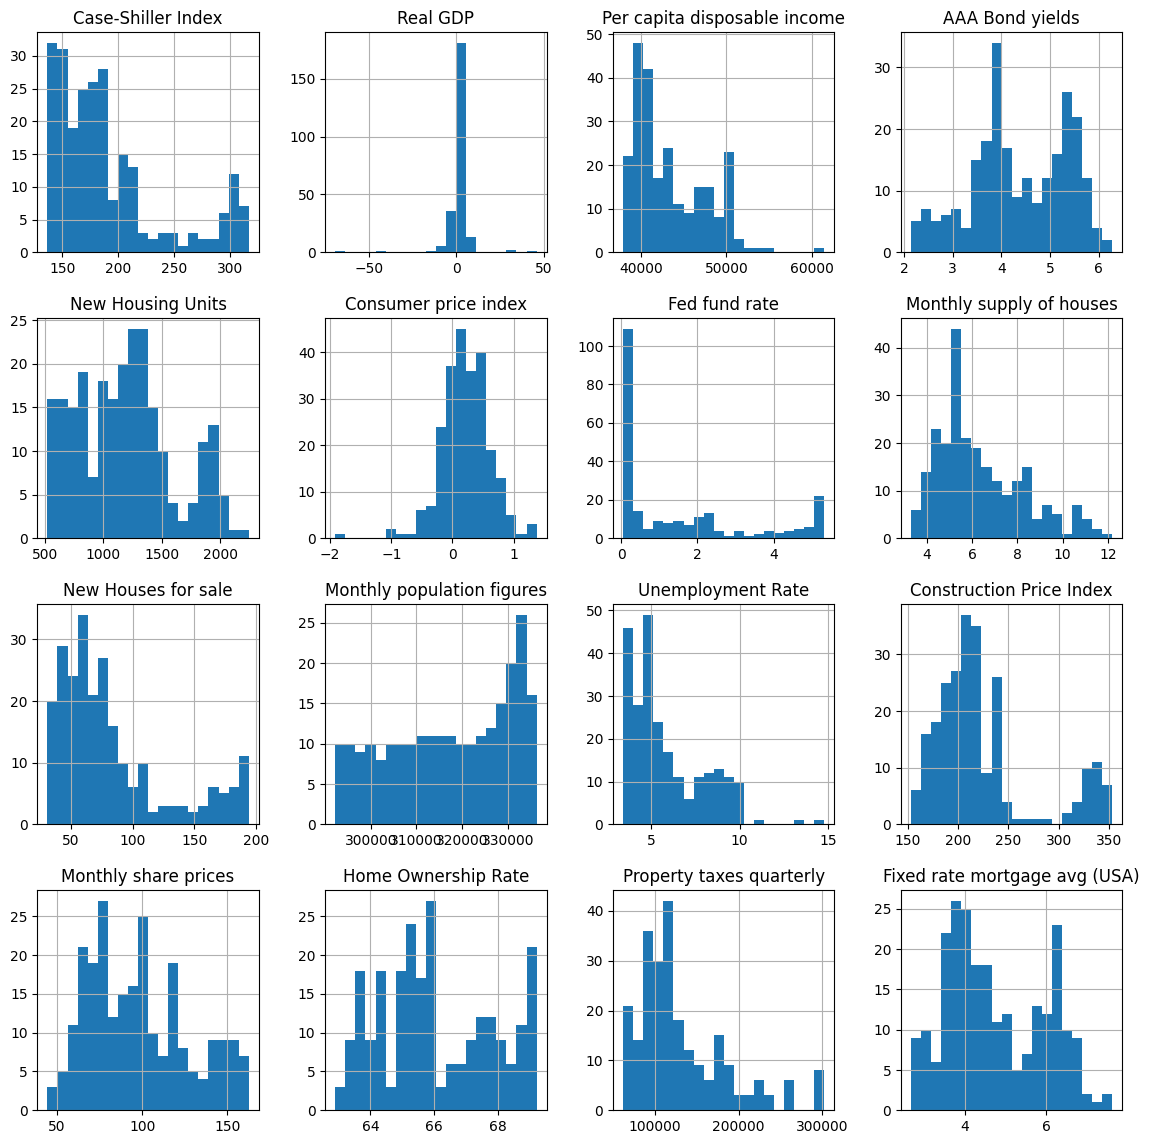

In [740]:
# Distribution plots
data_without_date = merged_data_final.drop(columns=['DATE'])

# Generate histograms for all columns
data_without_date.hist(figsize=(14, 14), bins=20)
plt.show()

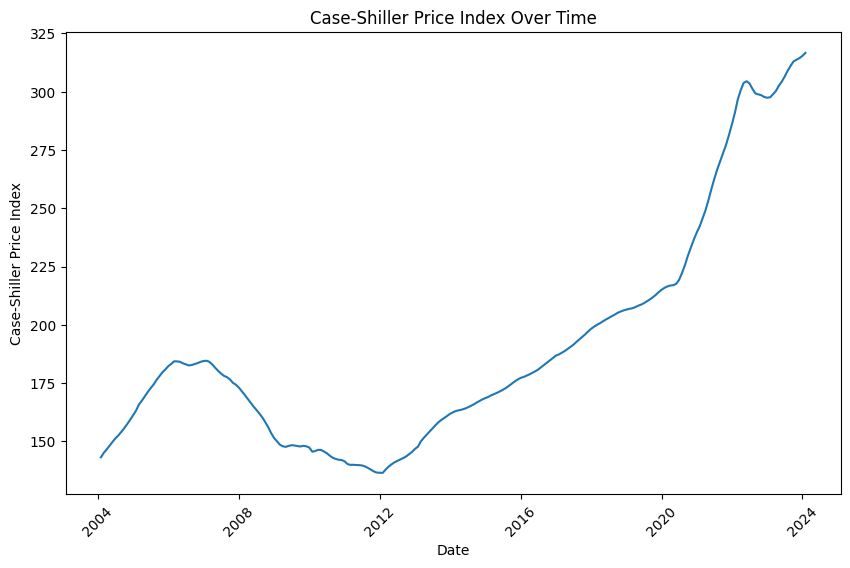

In [741]:
# Time series plot for the target variable
plt.figure(figsize=(10, 6))
plt.plot(merged_data_final['DATE'], merged_data_final['Case-Shiller Index'])
plt.title('Case-Shiller Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Case-Shiller Price Index')
plt.xticks(rotation=45)
plt.show()

In [742]:
# Correlation with target
correlation_with_target = merged_data_final.corr()['Case-Shiller Index'].sort_values(ascending=False)
print(correlation_with_target)




Case-Shiller Index               1.000000
Construction Price Index         0.917393
Monthly share prices             0.894481
Per capita disposable income     0.815034
Monthly population figures       0.691257
Property taxes quarterly         0.514268
New Housing Units                0.393055
Fed fund rate                    0.382940
Consumer price index             0.206616
Monthly supply of houses         0.164895
Fixed rate mortgage avg (USA)    0.132826
Real GDP                         0.032377
Home Ownership Rate             -0.171889
New Houses for sale             -0.244116
AAA Bond yields                 -0.314533
Unemployment Rate               -0.565563
Name: Case-Shiller Index, dtype: float64


C:\Users\kam00\AppData\Local\Temp\ipykernel_20232\3475846455.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = merged_data_final.corr()['Case-Shiller Index'].sort_values(ascending=False)


**Construction price index** has a strong positive correlation with the case-shiller index, along with monthly share prices and per capita disposable income. This is expected behaviour because as seen in the plot of the case-shiller index with time, the index has gone up in the last 20 yrs. Increase in cost of labor and raw materials has pushed the construction price index higher, the same increase in labor and raw material costs also increases cost of home construction and as a result, the prices. 

Increase in monthly share prices can mean a strong growing economy and as a result, increase in demand of houses leading to a surge in the prices, however, historical data shows a major economic crisis affecting the real estate market and the economy of the country in general around 2008.

Increase in disposable income can lead to people having the bandwidth to spend more on houses subsequently raising the prices due to the demand.

After these initial insights, the next step is to model the data. A linear regression model will be used for this task initially, and later a tree based model will be used inorder to capture non linear relationships in the data (if any)

Time series specific models like VAR were tried, but the lack of stationary columns in the dataframe led to the non-convergence, hence, the decision was made to proceed with linear regression and random forest.

In [743]:
# Removing DATE column
merged_data_final = merged_data_final.drop(columns=['DATE'])

# Splitting the data into features (X) and target variable (y)
X = merged_data_final.drop(columns=['Case-Shiller Index'])  # Features
y = merged_data_final['Case-Shiller Index']  # Target variable

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fitting a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the metrics
print("Linear Regression Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")
print(f"Adjusted R^2: {adj_r2}")


Linear Regression Metrics:
MSE: 27.403532696967613
RMSE: 5.234838363977212
R^2: 0.9900013109049451
MAE: 4.324154197154137
Adjusted R^2: 0.9854564522253747


### Detailed Analysis of the Linear Regression Model

#### Metrics Summary

1. **Mean Squared Error (MSE): 27.40**
2. **Root Mean Squared Error (RMSE): 5.23**
3. **R^2: 0.99**
4. **Mean Absolute Error (MAE): 4.32**
5. **Adjusted R^2: 0.985**


### 1. Mean Squared Error (MSE)

- **Value: 27.40**
- **Interpretation**:  The model's predictions deviate from the actual values by an average squared error of 27.40.
- **Analysis**: While the absolute value of MSE depends on the scale of the data, a lower MSE indicates better performance. 

### 2. Root Mean Squared Error (RMSE)

- **Value: 5.23**
- **Interpretation**: An RMSE of 5.23 means that, on average, the model's predictions are 5.23 units away from the actual values of the Case-Shiller index.
- **Analysis**: Similar to MSE, a lower RMSE indicates better performance. The RMSE of 5.23 is a concrete measure of prediction accuracy, and its low value in the context of the values of the index (which are in triple figures) suggests that the model is performing well.

### 3. R-Squared (R^2)

- **Value: 0.99**
- **Interpretation**: An R^2 of 0.99 indicates that 99% of the variance in house prices can be explained by the model's predictors.
- **Analysis**: An R^2 value of 0.99 is exceptionally high, suggesting that the model explains almost all of the variability in the target variable. This indicates an excellent fit to the training data.

### 4. Mean Absolute Error (MAE)

- **Value: 4.32**
- **Interpretation**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 
- **Analysis**: An MAE of 4.32 indicates that, on average, the model's predictions are off by 4.32 units. Like RMSE, a lower MAE indicates better predictive accuracy. Given the high R^2 and low RMSE, this low MAE further confirms the model's strong predictive performance.

### 5. Adjusted R-Squared (Adjusted R^2)

- **Value: 0.985**
- **Interpretation**: Adjusted R^2 adjusts the R^2 value based on the number of predictors in the model, providing a more accurate measure when multiple predictors are involved. It accounts for the model complexity.
- **Analysis**: An adjusted R^2 of 0.985 is very close to the R^2 value, suggesting that the high R^2 is not inflated by an excessive number of predictors. It indicates that the model has a good fit and is appropriately specified without overfitting.

### Overall Evaluation

The metrics indicate that the linear regression model has a very high level of accuracy and is well-specified:

- **High R^2 and Adjusted R^2** values suggest that the model explains almost all the variance in the data, indicating excellent fit.
- **Low RMSE and MAE** values indicate that the model makes predictions with high accuracy, with minimal deviation from actual values.
- **MSE**, while less interpretable on its own due to its squared nature, aligns with RMSE to indicate low prediction errors.



## Now next step is to verify if the model follows the assumptions of a linear regression model

### First assumption to be tested is that:

### There is a linear relationship between the predictors (x) and the outcome (y)

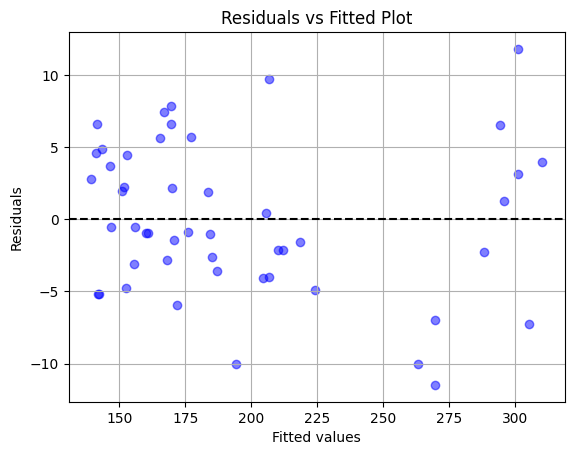

In [744]:
# The residuals vs fitted plot will be used
predicted_values = model.predict(X_test)

# Calculate residuals
residuals = y_test - predicted_values

# Plotting
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')  # Adding a horizontal line at y=0
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.grid(True)
plt.show()


### Distribution of Residuals:

The residuals appear to be scattered somewhat evenly around the horizontal line at zero.This indicates that the model does not exhibit obvious patterns, suggesting a reasonably good fit.

### Linearity:

There is no clear pattern or curvature in the residuals, which supports the assumption of linearity in the relationship between predictors and the target variable. The lack of curvature indicates that the linear model is appropriately capturing the underlying relationship in the data. Thereby verifying the assumption.

### Next assumption to be tested: 

### Residual Errors are Independent from Each Other & Predictors (x)

The plot does not show any clear patterns or clusters, which suggests that the residuals are independent of each other.
The randomness of residuals supports the independence assumption.

### Next assumption to be tested is:

### Residual Errors have a Mean Value of Zero


This can be easily deciphered from the above residuals vs fitted plot where the black line is flat at zero, which indicates that the residuals have a mean value of zero


### Next assumption to be tested is : 

### Residual Errors have Constant Variance

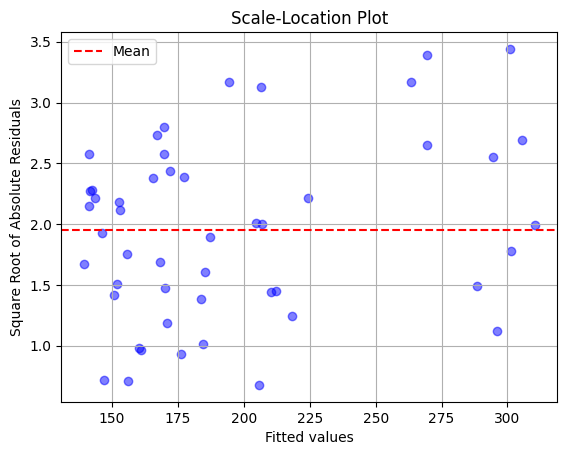

In [745]:
#Scale-location plot will be used
# Calculating square root of absolute residuals
sqrt_abs_residuals = np.sqrt(np.abs(residuals))

# Plotting
plt.scatter(predicted_values, sqrt_abs_residuals, color='blue', alpha=0.5)
plt.axhline(y=np.mean(sqrt_abs_residuals), color='red', linestyle='--', label='Mean')
plt.xlabel('Fitted values')
plt.ylabel('Square Root of Absolute Residuals')
plt.title('Scale-Location Plot')
plt.legend()
plt.grid(True)
plt.show()


 The Scale-Location plot shows the square root of the absolute residuals (y-axis) plotted against the fitted values (x-axis). The red dashed line represents the mean of the square root of the absolute residuals.
 
From the plot, following can be observed:

The points are scattered around the mean line, indicating that the assumption of constant variance is generally met

### Next assumption to be tested is:

### Predictors (x) are Independent & Observed with Negligible Error

In [746]:
import statsmodels.api as sm

# Durbin-Watson statistic will be used
# Performing Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)

# Print the result
print("Durbin-Watson Statistic:", durbin_watson_statistic)


Durbin-Watson Statistic: 2.074361493705127


### Interpretation of Durbin-Watson Statistic

The Durbin-Watson statistic helps in verifying the assumption that the residuals of the model are independent. This indirectly supports the assumption that the predictors (x) are independent and observed with negligible error.

The Durbin-Watson statistic of 2.074 suggests that the residuals of the regression model do not exhibit significant autocorrelation. This supports the assumption that the residuals are independent.

- **Independence of Predictors:** The lack of autocorrelation in residuals indicates that the predictors (x) do not have a time-dependent relationship influencing the model's errors.
- **Negligible Error in Observation:** The negligible autocorrelation suggests that errors are random and not influenced by previous observations, implying that the predictors are measured accurately without systematic errors.



The linear regression model demonstrates a robust fit to the data, as all assumptions underlying the model have been rigorously met. 

Now,the next step is to calculate the coefficents

In [747]:
def interpret_linear_model(model, feature_names):
    coefficients = model.coef_
    for coef, feature in zip(coefficients, feature_names):
        print(f"Feature: {feature}, Coefficient: {coef}")


print("Linear Regression Coefficients:")
interpret_linear_model(model, X.columns)




Linear Regression Coefficients:
Feature: Real GDP, Coefficient: 0.29294465056057306
Feature: Per capita disposable income, Coefficient: -1.02999937376293
Feature: AAA Bond yields, Coefficient: -2.442597123379747
Feature: New Housing Units, Coefficient: 17.726133709558642
Feature: Consumer price index, Coefficient: 0.9584808174765859
Feature: Fed fund rate, Coefficient: 1.9514982731362966
Feature: Monthly supply of houses, Coefficient: 1.4981608288901753
Feature: New Houses for sale, Coefficient: 3.0966557255468303
Feature: Monthly population figures, Coefficient: 12.750706212507037
Feature: Unemployment Rate, Coefficient: 3.4580455641213184
Feature: Construction Price Index, Coefficient: 31.167643391872016
Feature: Monthly share prices, Coefficient: 5.455170777902827
Feature: Home Ownership Rate, Coefficient: 1.6642574945289097
Feature: Property taxes quarterly, Coefficient: 1.5440772071514146
Feature: Fixed rate mortgage avg (USA), Coefficient: 3.984094925623932


### Interpreting the coefficients:

**Real GDP (0.29294465056057306)**: A one-unit increase in Real GDP is associated with an approximate increase of 0.29 points in the Case-Shiller Index, suggesting a positive relationship between economic growth and housing market performance.

**Per capita disposable income (-1.02999937376293)**: An increase in per capita disposable income is associated with a decrease of approximately 1.03 points in the Case-Shiller Index, indicating that higher disposable income might lead to decreased housing market activity or prices.

**AAA Bond yields (-2.442597123379747)**: A rise in AAA bond yields is associated with a decrease of about 2.44 points in the Case-Shiller Index, suggesting an inverse relationship between bond yields and housing market performance.

**New Housing Units (17.726133709558642)**: Each additional new housing unit is associated with an increase of approximately 17.73 points in the Case-Shiller Index, indicating a strong positive impact of new housing supply on the housing market.

**Consumer price index (0.9584808174765859)**: An increase in the consumer price index is associated with a rise of about 0.96 points in the Case-Shiller Index, suggesting a positive relationship between inflation and housing prices.

**Fed fund rate (1.9514982731362966)**: A one-unit increase in the Federal Funds Rate is associated with an increase of approximately 1.95 points in the Case-Shiller Index, indicating that higher interest rates might stimulate housing demand.

**Monthly supply of houses (1.4981608288901753)**: An increase in the monthly supply of houses is associated with a rise of about 1.50 points in the Case-Shiller Index, indicating that greater housing supply could lead to higher housing market activity or prices.

**New Houses for sale (3.0966557255468303)**: Each additional new house for sale is associated with an increase of approximately 3.10 points in the Case-Shiller Index, suggesting that an increase in available housing inventory might stimulate housing market activity.

**Monthly population figures (12.750706212507037)**: An increase in monthly population figures is associated with an increase of about 12.75 points in the Case-Shiller Index, indicating a strong positive relationship between population growth and housing market performance.

**Unemployment Rate (3.4580455641213184)**: An increase in the unemployment rate is associated with an increase of approximately 3.46 points in the Case-Shiller Index, suggesting a positive relationship between unemployment and housing market performance, potentially indicating economic distress.

**Construction Price Index (31.167643391872016)**: A one-unit increase in the Construction Price Index is associated with an increase of approximately 31.17 points in the Case-Shiller Index, indicating a strong positive impact of construction costs on housing market prices.

**Monthly share prices (5.455170777902827)**: An increase in monthly share prices is associated with an increase of about 5.46 points in the Case-Shiller Index, suggesting a positive relationship between stock market performance and housing market activity.

**Home Ownership Rate (1.6642574945289097)**: An increase in the home ownership rate is associated with an increase of approximately 1.66 points in the Case-Shiller Index, indicating a positive relationship between home ownership and housing market performance.

**Property taxes quarterly (1.5440772071514146)**: An increase in quarterly property taxes is associated with an increase of about 1.54 points in the Case-Shiller Index, suggesting that higher property taxes might influence housing market prices.

**Fixed rate mortgage avg (USA) (3.984094925623932)**: An increase in the average fixed-rate mortgage is associated with an increase of approximately 3.98 points in the Case-Shiller Index, indicating a positive relationship between mortgage rates and housing market activity.

### These factors had the most significant impact on the index.

**New Housing Units (17.73)**: This factor had a substantial positive impact on housing prices. Each additional new housing unit led to an increase of approximately 17.73 points in the Case-Shiller Index, indicating a strong relationship between housing supply and prices.

**Monthly population figures (12.75)**: Population growth emerged as an influential factor. An increase in monthly population figures resulted in a rise of about 12.75 points in the Case-Shiller Index, highlighting the importance of demographic trends in driving housing market dynamics.

**Construction Price Index (31.17)**: Despite not directly linked to demand or population, the Construction Price Index had a significant positive impact on housing prices. A one-unit increase in this index was associated with a substantial increase of approximately 31.17 points in the Case-Shiller Index, indicating the influence of construction costs on overall housing market performance.

### Now The tree based random forest model is used to analyse the data


In [748]:
# Fit a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the testing set
rf_y_pred = rf_model.predict(X_test)

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_adj_r2 = 1 - (1 - rf_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the metrics
print("\nRandom Forest Regression Metrics:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")
print(f"MAE: {rf_mae}")
print(f"Adjusted R^2: {rf_adj_r2}")





Random Forest Regression Metrics:
MSE: 8.247682710749018
RMSE: 2.8718779066577707
R^2: 0.9969906794101563
MAE: 1.903442653061243
Adjusted R^2: 0.9956228064147727


### Evaluating the Random Forest Regression Metrics:
- **MSE (Mean Squared Error):** 8.25
  - the MSE of 8.25 indicates that, on average, the squared difference between the predicted housing prices and the actual prices is approximately 8.25 units.

- **RMSE (Root Mean Squared Error):** 2.87
  - With an RMSE of 2.87, it suggests that, on average, the difference between the predicted and actual housing prices is approximately 2.87 units.

- **R^2 (R-squared):** 0.9969
  - An R-squared value close to 1 indicates that the model explains a high percentage (approximately 99.69% in this case) of the variance in the housing prices.

- **MAE (Mean Absolute Error):** 1.903
  -  With a MAE of 1.903, it indicates that, on average, the absolute difference between the predicted and actual housing prices is approximately 1.903 units.

- **Adjusted R^2:** 0.9956
  - In this case, the Adjusted R-squared value of 0.9956 indicates that approximately 99.56% of the variance in the housing prices is explained by the independent variables, considering the model's complexity.

This model demonstrates strong predictive performance and robustness, as evidenced by its low error metrics and high explanatory power. 

In [749]:
#Getting the feature importances
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importance_df)



Feature Importances:
                          Feature  Importance
8      Monthly population figures    0.397623
10       Construction Price Index    0.335347
11           Monthly share prices    0.128421
9               Unemployment Rate    0.086954
1    Per capita disposable income    0.025125
14  Fixed rate mortgage avg (USA)    0.006425
3               New Housing Units    0.006108
6        Monthly supply of houses    0.004751
2                 AAA Bond yields    0.003182
5                   Fed fund rate    0.002416
7             New Houses for sale    0.001378
12            Home Ownership Rate    0.000794
0                        Real GDP    0.000731
13       Property taxes quarterly    0.000532
4            Consumer price index    0.000212


### Evaluating the feature importances

- **Monthly population figures (Importance: 0.3976):** 
  - This feature has the highest importance, suggesting that changes in the population size have the most substantial impact on the Case-Shiller Index. A higher population typically leads to increased housing demand, which can drive up housing prices.

- **Construction Price Index (Importance: 0.3353):** 
  - The Construction Price Index is the second most important feature. A higher construction price index indicates increased costs associated with building new homes, which can constrain housing supply and drive up prices.

- **Unemployment Rate (Importance: 0.08695):** 
  - The unemployment rate also has a significant impact on the Case-Shiller Index, albeit less than population and construction costs. High unemployment rates may indicate economic distress, leading to decreased housing demand and lower prices.

- **Monthly share prices (Importance: 0.128421):** 
  - Changes in monthly share prices have a moderate impact on the Case-Shiller Index. Stock market performance can influence consumer confidence and investment decisions, indirectly affecting housing market activity and prices.

- **Per capita disposable income (Importance: 0.025125):** 
  - Per capita disposable income contributes moderately to the prediction of the Case-Shiller Index. Higher disposable incomes generally increase purchasing power, potentially boosting housing demand and prices.

- **Fixed rate mortgage avg (USA) (Importance:0.006425):** 
  - This feature has a relatively low importance compared to others. However, it still contributes to the model's prediction. Average fixed-rate mortgages can influence affordability and accessibility to housing finance.

- **AAA Bond yields (Importance: 0.003182):** 
  - Bond yields have a minor impact on the Case-Shiller Index compared to other factors. Changes in bond yields can affect mortgage rates, influencing housing affordability and demand.

- **New Housing Units (Importance: 0.006108):** 
  - The number of new housing units constructed contributes marginally to the prediction. Increasing housing supply can alleviate price pressures but may not be as influential as other factors.


### SHAP Analysis of the random forest

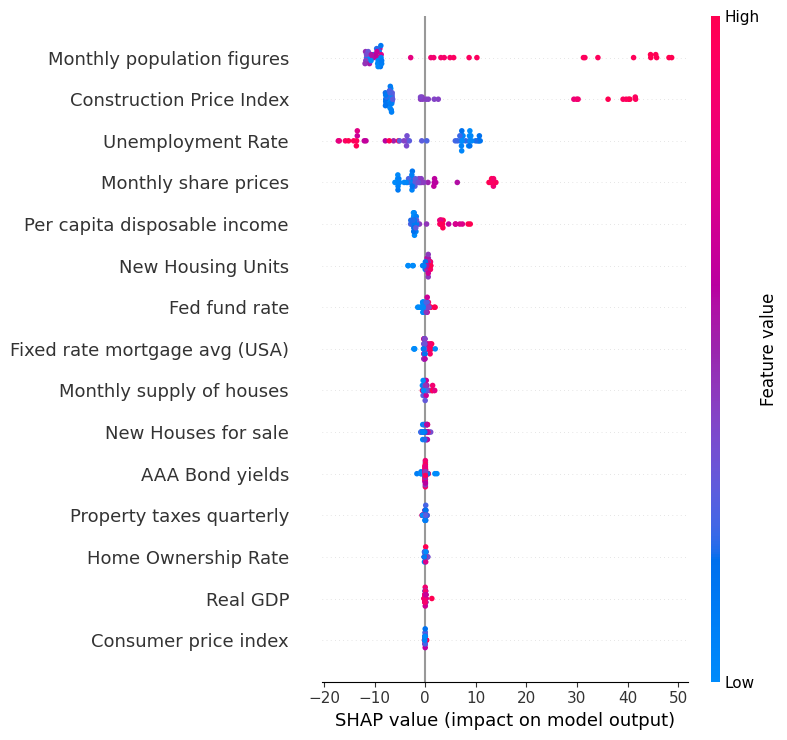

In [750]:
import shap

# Initialize a SHAP explainer object 
explainer = shap.Explainer(rf_model, X_train)

# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)


# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


This plot displays the SHAP (SHapley Additive exPlanations) values for the features used in the random forest model. SHAP values help explain the impact of each feature on the model's output or prediction.


The x-axis represents the SHAP value, which can be positive or negative. A positive SHAP value indicates that the feature contributes to increasing the model's output or prediction, while a negative SHAP value indicates that the feature contributes to decreasing the output or prediction.


Features like "Monthly population figures," "Construction Price Index," and "Unemployment Rate" have positive SHAP values, suggesting that higher values of these features contribute to increasing the model's output or prediction.

### Factors Affecting the Case-Shiller Index

Both the Linear Regression and Random Forest models, along with SHAP values analysis, consistently identify the Construction Price Index and Population as the most significant factors impacting the Case-Shiller Index.

**Construction Price Index**:
A higher Construction Price Index signifies increased costs associated with building new homes, which directly impacts housing supply and ultimately drives up prices in the housing market. Rising construction costs can constrain housing supply, leading to a decrease in housing availability and an increase in prices due to heightened demand and limited inventory.


**Population**:
Population growth is a fundamental driver of housing demand. An increase in population typically leads to heightened demand for housing, stimulating market activity and driving up prices. Growing population figures directly correlate with increased demand for housing units, resulting in competitive bidding and upward pressure on housing prices.


These two factors, Construction Price Index and Population, underscore the complex interplay between supply and demand dynamics in the housing market. While construction costs influence housing supply, population growth drives demand, ultimately shaping the trajectory of housing prices reflected in the Case-Shiller Index.